# WQChartPy
Paquete de Python para hacer algunos gráficos hidroquímicos de aguas subterráneas.

Si nunca se ha trabajado antes con un Jupyter notebooks hay muchos tutoriales gratuitos en la red, por ejemplo: https://tinyl.io/8qs8

En la celda a continuación importamos las funciones y librerías que se van a utilizar en este notebok.

In [1]:
import pandas as pd
import numpy as np

from gw_chem_plot import graph_parameters_get, GWChemPlot
from ions import Ions

## Fichero de datos
El fichero de datos contiene los datos de los análisis de agua y los parámetros que controlan su representación en el gráfico.
### Formato del fichero
Se pueden utilizar varios formatos, los más frecuentes CSV o Excel xlsx; aquí se utiliza el formato __Excel xlsx__. Los ficheros xlsx, aunque son un formato propietario, pueden ser creados y manipulados con programas libres, como por ejemplo LibreOffice Cal
### Nombres válidos de las columnas
En el fichero de datos la __primera fila__ contiene siempre un nombre que designa el __contenido de la columna__.<br>
Las columnas pueden hacer referencia a __contenidos obligatorios u opcionales__.
Los contenidos obligatorios son:
1. El nombre de los iones a representar.
2. El nombre de los parámetros que determinan el aspecto de la representación del análisis en el gráfico.

En general, los contenidos opcionales no se tienen en cuenta en la aplicación __a excepción del ion__ $NO_3^{-1}$, que cuando está presente se representa en el diagrama de Piper sumado al ion $SO_4^{-2}$

<em><h4>Nombres de los iones</h4></em>
Los datos de los iones deben estar presentes, salvo en caso del nitrato que es opcional. Los nombres de la cabecera de cada ión son los siguientes:

In [2]:
ions = Ions()
print('Nombres válidos de las columnas para los iones')
ions.ions_names_get()

Nombres válidos de las columnas para los iones


['Cl', 'SO4', 'CO3', 'HCO3', 'NO3', 'Ca', 'Mg', 'K', 'Na']

<em><h4>Nombres de parámetros que determinan el aspecto de los análisis en los gráficos (por ejemplo Piper)</h4></em>

In [3]:
graph_parameters_get()

{'Sample': 'Identificador del análisis',
 'Label': 'Identificador del análisis en el diagrama (gráfico)',
 'Color': 'Color de Label',
 'Marker': 'Marcador (símbolo) de Label',
 'Size': 'Tamaño en dpi del marcador',
 'Alpha': 'Transparencia del marcador (superposiciones en el gráfico)'}

### Contenidos en el fichero de datos
Hay dos tipos de contenidos: __numéricos y alfanuméricos__. 

1. Todos los iones analizados tienen valores numéricos y todos deben tener un valor; si un análisis no tiene un valor de un ion, ese análisis no se considera para hacer los gráficos.
2. El resto de columnas obligatorias tienen los nombres de los parámetros y también tienen que tener un contenido

Además de las columnas obligatorias se pueden incluir otras columnas opcionales, numéricas o alfanuméricas

1. Las columnas opcionales alfanuméricas pueden tener valores en blanco
2. Sin embargo, si se añade una columna opcional numérica, por ejemplo la conductividad del agua, y faltan los valores en algunas celdas, no se tendrán en cuenta los análisis (filas del fichero) correspondientes a esos valores en blanco. Si quieres incluir una columna numérica opcional sin perder la representación del análisis, márcalo con un valor numérico negativo, por ejemplo -1. El nombre de la columna opcional es libre.  
### Lectura del fichero de datos
1. Primero indicamos __la ruta y el nombre del fichero de datos__, que se introduce en la variable fdata y se escribe a la derecha del signo '=' entre ' '. En el SO Windows el separador de directorios es el signo '\', pero en el entorno de Jupyter se puede utilizar también el símbolo '/'. Esta última opción tiene algunas ventajas y es la que se utiliza en este tutorial.
2. A continuación se lee el fichero de datos de ejemplo utilizando la función __read_excel__; los datos se almacenan en la variable __'data'__. Esta instrucción tiene 2 partes: la situada a la izquierda del . ('pd') es una manera de indicar que se va a utilizar una función (o método) que está incluido en la librería pandas y que hemos importado en la primera celda con el alias 'pd'; a continuación figura el nombre de la función propiamente dicho, 'read_excel' y entre paréntesis la ruta del fichero de datos, que se indica mediante la variable 'fdata'
3. Si la lectura del fichero se realiza correctamente aparecera a continuación algunas filas de su contenido.

Nunca se debe marcar el contenido de un ion obligatorio sin dato con un signo negativo, por la reperscusión que va a tener en el balance iónico del análisis.

In [4]:
# Lectura del fichero de datos (fichero Excel) y visualización 
fdata = './data/data_template.xlsx'
data = pd.read_excel(fdata)
data

,Punto muestreo,Fecha muestreo,Sample,Label,Color,Marker,Size,Alpha,pH,Ca,Mg,Na,K,HCO3,CO3,Cl,SO4,TDS
0,PM1,15/01/2023,PM1-15/01/2023,C1,red,o,30.0,0.6,7.8,32.0,6.0,28.0,2.8,73.0,0.0,43.0,48.0,233.0
1,PM1,26/01/2023,PM1-26/01/2023,C1,red,o,30.0,0.6,7.1,134.0,21.0,39.0,6.4,275.0,0.0,96.0,100.0,673.0
2,PM2,15/01/2023,PM2-15/01/2023,C2,green,o,30.0,0.6,7.6,46.0,11.0,17.0,0.7,201.0,0.0,14.0,9.0,299.0
3,PM2,26/01/2023,PM2-26/01/2023,C2,green,o,30.0,0.6,7.5,54.0,11.0,16.0,2.4,207.0,0.0,18.0,10.0,377.0
4,PM3,15/01/2023,PM3-15/01/2023,C3,blue,o,30.0,0.6,7.7,50.0,11.0,25.0,2.8,244.0,0.0,18.0,9.0,360.0
5,PM3,26/01/2023,PM3-26/01/2023,C3,blue,o,30.0,0.6,7.4,50.0,22.0,25.0,0.5,305.0,0.0,11.0,9.0,424.0
6,PM4,15/01/2023,PM4-15/01/2023,C4,yelow,o,30.0,0.6,7.4,50.0,22.0,25.0,NaN,305.0,0.0,11.0,9.0,424.0
7,PM4,26/01/2023,PM4-26/01/2023,C4,yelow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,PM5,15/01/2023,PM5-15/01/2023,C1,magenta,o,30.0,0.6,7.8,32.0,6.0,28.0,2.8,150.0,0.0,43.0,48.0,233.0
9,PM5,26/01/2023,PM5-26/01/2023,C1,magenta,o,30.0,0.6,7.1,250.0,21.0,39.0,6.4,275.0,0.0,180.0,12.0,673.0


El fichero que se acaba de leer es un fichero Excel xlsx de una sola hoja o con más de una hoja si los datos están en la primera. __Si el fichero xlsx tiene más de una hoja y los datos están en una hoja diferente a la primera__, debe indicarse la hoja que queremos leer. Esto se hace utilizando un argumento más en la función read_excel llamado 'sheet_name', como se pone de ejemplo en la celda a continuación.<br>
El contenido de sheet_name se puede especificar de 2 maneras diferentes:
* Mediante un número que denota la posición de la hoja en el fichero (libro) de Excel. Aquí hay que hacer una indicación: la numeración de la hoja empieza por 0, no por 1 (0, 1, 2...). En el ejemplo la sintaxis es sheet_name=0.   
* Mediante el nombre de la hoja entre ' '. En el ejemplo la sintaxis es sheet_name='Hoja1'.

A continuación se vuelve a cargar los datos del fichero de datos utilizando el parámetro 'sheet_name'. Como no se ha escrito la linea data debajo, no aparecen los datos leidos, pero se puede añadir si se prefiere.

In [5]:
data = pd.read_excel(fdata, sheet_name=0)

1. Las columnas 'Punto de muestreo' y 'Fecha de muestreo' son alfanuméricas opcionales; uniendo los contenidos de las dos columnas se obtiene la columna obligatoria 'Sample'. Es una manipulación externa que se puede hacer fácilmente en Excel, Calc o similar.
1. Las columnas pH y TDS (TSD) son opcionales; no intervienen en los gráficos
1. La columna de la izquierda (sin nombre) representa el número de análisis (fila de datos) según el orden en el fichero de datos y es asignado automáticamente
La fila 7 tiene varias celdas sin dato (en blanco en el fichero original); la ausencia de valor es sustituida atomáticamente por la representación NaN (Not a Number). Esta fila no será considerada, como veremos más adelante). 

Cuando el número de filas (análisis de agua) es alto, es más fácil inspeccionar los tipos de las columnas y las celdas sin valor con instrucción data.info(). Como ya se ha visto anteriormente, la instrucción tiene 2 partes: a la izquierda del punto se escribe el nombre de la variable en que se han almacenado los datos ('data' en este caso); a continuación el nombre de la función que realiza la tarea deseada 'info()'<br>
1. Para cada columna nos indica el número de valores no nulos y nulos
2. A continuación nos dice el tipo: Hay dos clases de tipos (deducidos por el contenido de la columna):
    1. object. Valores alfanuméricos.
    2. float64. Valores numéricos.
3. Si alguna columna de un ion que interviene en los gráficos es de tipo 'object', quiere decir que tenemos alguna celda con un contenido texto y entonces la columna entera es leida como tipo 'object', por lo que hay que arreglarla en el fichero de datos y empezar otra vez por el principio.


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Punto muestreo  10 non-null     object 
 1   Fecha muestreo  10 non-null     object 
 2   Sample          10 non-null     object 
 3   Label           10 non-null     object 
 4   Color           10 non-null     object 
 5   Marker          9 non-null      object 
 6   Size            9 non-null      float64
 7   Alpha           9 non-null      float64
 8   pH              9 non-null      float64
 9   Ca              9 non-null      float64
 10  Mg              9 non-null      float64
 11  Na              9 non-null      float64
 12  K               8 non-null      float64
 13  HCO3            9 non-null      float64
 14  CO3             9 non-null      float64
 15  Cl              9 non-null      float64
 16  SO4             9 non-null      float64
 17  TDS             9 non-null      float6

## Filtrar los datos de los análisis
Para entrar en el proceso de crear los gráficos hidroquímicos los primero que hay que hacer es crear una variable de tipo GWChemPlot con los datos 'data'; en este caso el nombre de la variable es 'gwp', pero podría ser cualquier otro. A continuación se muestran los datos que han sido aceptados.

In [7]:
gwp = GWChemPlot(data)
gwp.data

,Punto muestreo,Fecha muestreo,Sample,Label,Color,Marker,Size,Alpha,pH,Ca,Mg,Na,K,HCO3,CO3,Cl,SO4,TDS
0,PM1,15/01/2023,PM1-15/01/2023,C1,red,o,30.0,0.6,7.8,32.0,6.0,28.0,2.8,73.0,0.0,43.0,48.0,233.0
1,PM1,26/01/2023,PM1-26/01/2023,C1,red,o,30.0,0.6,7.1,134.0,21.0,39.0,6.4,275.0,0.0,96.0,100.0,673.0
2,PM2,15/01/2023,PM2-15/01/2023,C2,green,o,30.0,0.6,7.6,46.0,11.0,17.0,0.7,201.0,0.0,14.0,9.0,299.0
3,PM2,26/01/2023,PM2-26/01/2023,C2,green,o,30.0,0.6,7.5,54.0,11.0,16.0,2.4,207.0,0.0,18.0,10.0,377.0
4,PM3,15/01/2023,PM3-15/01/2023,C3,blue,o,30.0,0.6,7.7,50.0,11.0,25.0,2.8,244.0,0.0,18.0,9.0,360.0
5,PM3,26/01/2023,PM3-26/01/2023,C3,blue,o,30.0,0.6,7.4,50.0,22.0,25.0,0.5,305.0,0.0,11.0,9.0,424.0
8,PM5,15/01/2023,PM5-15/01/2023,C1,magenta,o,30.0,0.6,7.8,32.0,6.0,28.0,2.8,150.0,0.0,43.0,48.0,233.0
9,PM5,26/01/2023,PM5-26/01/2023,C1,magenta,o,30.0,0.6,7.1,250.0,21.0,39.0,6.4,275.0,0.0,180.0,12.0,673.0


Nótese que no se han cargado los análisis del punto de muestreo PM4 por no cumplir los requisitos que se han comentantado previamente.<br>
### Errores de balance iónico (columna cbe, charge balance error) 
Una vez inspeccionados los datos filtrados, se procede a continuación a realizar el balance iónico y ver el error.<br>
El resultado del error del balance iónico se ejecuta en la instrucción 'gwp.cbe()'; el resultado se guarda en la variable 'er_cbe' y a continuación se muestran los resultados obtenidos


In [8]:
er_cb = gwp.cbe()
er_cb

,Sample,HCO3,CO3,Cl,SO4,Ca,Mg,Na,K,cbe
0,PM1-15/01/2023,1.196392,0.0,1.212873,0.999348,1.596886,0.493726,1.217933,0.071614,-0.419140
1,PM1-26/01/2023,4.506955,0.0,2.707810,2.081976,6.686960,1.728039,1.696407,0.163690,4.998790
2,PM2-15/01/2023,3.294175,0.0,0.394889,0.187378,2.295524,0.905164,0.739459,0.017904,1.041659
3,PM2-26/01/2023,3.392508,0.0,0.507714,0.208198,2.694745,0.905164,0.695962,0.061384,2.939329
4,PM3-15/01/2023,3.998899,0.0,0.507714,0.187378,2.495134,0.905164,1.087440,0.071614,-1.455023
5,PM3-26/01/2023,4.998623,0.0,0.310270,0.187378,2.495134,1.810327,1.087440,0.012788,-0.830869
8,PM5-15/01/2023,2.458339,0.0,1.212873,0.999348,1.596886,0.493726,1.217933,0.071614,-16.028404
9,PM5-26/01/2023,4.506955,0.0,5.077144,0.249837,12.475672,1.728039,1.696407,0.163690,24.055653


### Opcional. Grabar los errores de balance iónico en un fichero
El resultado obtenido se puede grabar en un fichero.<br>
A continuación se incluye la instrucción opcional de grabar el resultado en una hoja Excel

In [9]:
fo = './data/cbe_data_template.xlsx'
er_cb.to_excel(fo)

Al inspeccionar 'er_cb' se observa que hay 2 análisis que tienen un valor absoluto de cbe > 10. Para filtrar se indica que se van a utilizar los análisis con un valor de cbe > -10 o < 10. A continuación se crea un filtro y se almacena en la variable 'mask', cuyo contenido se muestra a continuación:

In [10]:
mask = (np.abs(er_cb['cbe']) <= 10)
mask

0     True
1     True
2     True
3     True
4     True
5     True
8    False
9    False
Name: cbe, dtype: bool

Se puede observar que los análisis que no se quieren considerar (las filas 8 y 9) aparecen con un valor False.

Si se quiere utilizar un límite diferente para los valores negativos y positivos de cbe, el filtro también se puede escribir de la siguiente manera:

In [11]:
mask = (er_cb['cbe'] >= -10) & (er_cb['cbe'] <= 10)
mask

0     True
1     True
2     True
3     True
4     True
5     True
8    False
9    False
Name: cbe, dtype: bool

A continuación se aplica el filtro a los datos almacenados en el objeto 'gwp'

In [12]:
gwp.data[mask]

,Punto muestreo,Fecha muestreo,Sample,Label,Color,Marker,Size,Alpha,pH,Ca,Mg,Na,K,HCO3,CO3,Cl,SO4,TDS
0,PM1,15/01/2023,PM1-15/01/2023,C1,red,o,30.0,0.6,7.8,32.0,6.0,28.0,2.8,73.0,0.0,43.0,48.0,233.0
1,PM1,26/01/2023,PM1-26/01/2023,C1,red,o,30.0,0.6,7.1,134.0,21.0,39.0,6.4,275.0,0.0,96.0,100.0,673.0
2,PM2,15/01/2023,PM2-15/01/2023,C2,green,o,30.0,0.6,7.6,46.0,11.0,17.0,0.7,201.0,0.0,14.0,9.0,299.0
3,PM2,26/01/2023,PM2-26/01/2023,C2,green,o,30.0,0.6,7.5,54.0,11.0,16.0,2.4,207.0,0.0,18.0,10.0,377.0
4,PM3,15/01/2023,PM3-15/01/2023,C3,blue,o,30.0,0.6,7.7,50.0,11.0,25.0,2.8,244.0,0.0,18.0,9.0,360.0
5,PM3,26/01/2023,PM3-26/01/2023,C3,blue,o,30.0,0.6,7.4,50.0,22.0,25.0,0.5,305.0,0.0,11.0,9.0,424.0


Se puede observar que han desaparecido los análisis de punto de muestreo PM5 (filas 8 y 9 de la variable 'mask' con valor False).

A continuación se actualizan los datos en 'gwp'; de esta manera nos ahorramos utilizar la máscara 'mask' cada vez que queremos hacer algo con los datos filtrados.

In [13]:
gwp.data = gwp.data[mask]
gwp.data

,Punto muestreo,Fecha muestreo,Sample,Label,Color,Marker,Size,Alpha,pH,Ca,Mg,Na,K,HCO3,CO3,Cl,SO4,TDS
0,PM1,15/01/2023,PM1-15/01/2023,C1,red,o,30.0,0.6,7.8,32.0,6.0,28.0,2.8,73.0,0.0,43.0,48.0,233.0
1,PM1,26/01/2023,PM1-26/01/2023,C1,red,o,30.0,0.6,7.1,134.0,21.0,39.0,6.4,275.0,0.0,96.0,100.0,673.0
2,PM2,15/01/2023,PM2-15/01/2023,C2,green,o,30.0,0.6,7.6,46.0,11.0,17.0,0.7,201.0,0.0,14.0,9.0,299.0
3,PM2,26/01/2023,PM2-26/01/2023,C2,green,o,30.0,0.6,7.5,54.0,11.0,16.0,2.4,207.0,0.0,18.0,10.0,377.0
4,PM3,15/01/2023,PM3-15/01/2023,C3,blue,o,30.0,0.6,7.7,50.0,11.0,25.0,2.8,244.0,0.0,18.0,9.0,360.0
5,PM3,26/01/2023,PM3-26/01/2023,C3,blue,o,30.0,0.6,7.4,50.0,22.0,25.0,0.5,305.0,0.0,11.0,9.0,424.0


## Diagrama Piper
Primero se almacena en una variable nueva, por ejemplo 'fig_Piper' el directorio y el nombre de la imagen en formato png con el diagrama de Piper. La imagen también se muestra en pantalla

Piper plot created


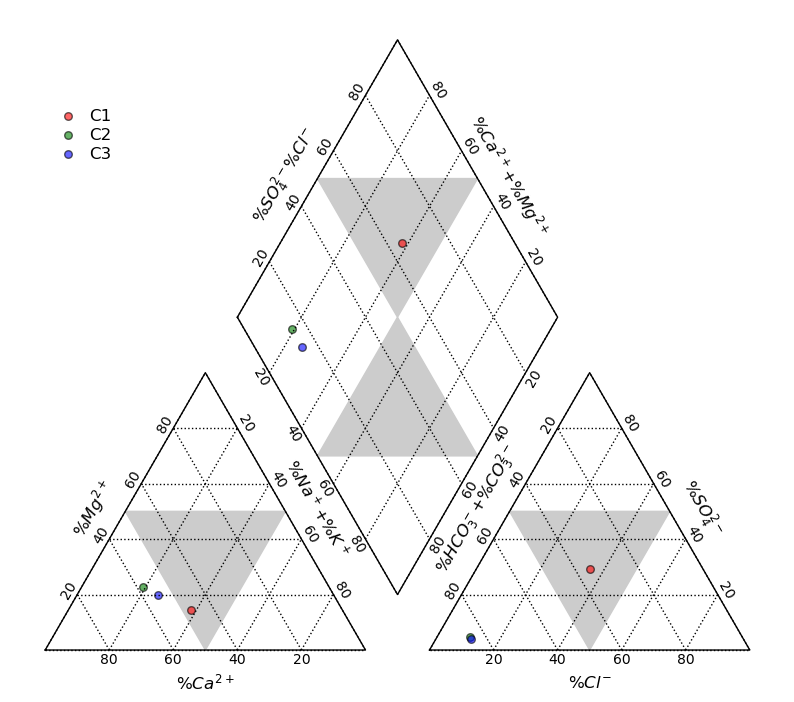

In [14]:
fig_Piper = './out/piper2_data_template.png'
gwp.plot_Piper2(fig_Piper)

También se puede mostrar una tabla con la clasificación de iones mayoritarios. En la tabla se muestra el tanto por uno en meq/L de cada ion y el tipo correspondiente que resulta.

In [15]:
ids = gwp.ion_dominant_classification()
ids

,Sample,HCO3_CO3,Cl,SO4,Na_K,Ca,Mg,cations_classified,anions_classified
0,PM1-15/01/2023,0.350991,0.355826,0.293183,0.381505,0.472429,0.146066,Mixta (cálcico-sódico-magnésica),Mixta ({cloride_label.lower()}-bicarbonatada-s...
1,PM1-26/01/2023,0.484789,0.291264,0.223947,0.181030,0.650793,0.168177,Cálcica (sódico-magnésica),Mixta (bicarbonatada-{cloride_label.lower()}-s...
2,PM2-15/01/2023,0.849793,0.101869,0.048338,0.191347,0.579963,0.228689,Cálcica (magnésico-sódica),Bicarbonatada (clorurada-sulfatada)
3,PM2-26/01/2023,0.825745,0.123579,0.050676,0.173813,0.618450,0.207737,Cálcica (magnésico-sódica),Bicarbonatada (clorurada-sulfatada)
4,PM3-15/01/2023,0.851919,0.108163,0.039919,0.254215,0.547256,0.198529,Cálcica (sódico-magnésica),Bicarbonatada (clorurada-sulfatada)
5,PM3-26/01/2023,0.909457,0.056451,0.034092,0.203532,0.461576,0.334893,Mixta (cálcico-magnésico-sódica),Bicarbonatada (clorurada-sulfatada)


La tabla se puede guardar en varios formato, por ejemplo Excel. En la variable 'fo' se escribe la ruta y nombre del fichero de salida. A continuación se ejecuta el método 'to_excel'. En este caso se ha seleccionado no grabar el número entero de la izquierda que indica el número de fila (index=False) y que los números tengan un máximo de 3 decimales (float_format='%.3f')

In [16]:
fo = './out/facies_data_template.xlsx'
ids.to_excel(fo, index=False, float_format='%.3f')

## Diagrama Schoeller
Al igual que en el caso del diagrama de Piper, primero se almacena en una variable nueva, por ejemplo 'fig_Schoeller' el directorio y el nombre de la imagen en formato png que va a contener este tipo de gráfico. La imagen también se muestra en pantalla.

Schoeller plot saved


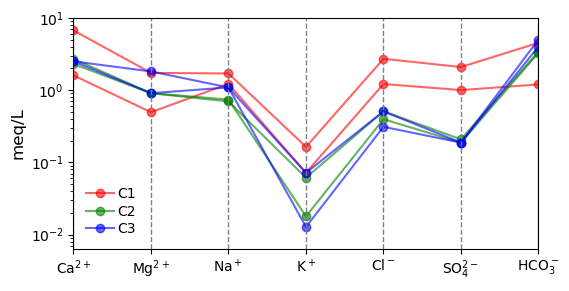

In [17]:
fig_Schoeller = './out/schoeller_data_template.png'
gwp.plot_Shoeller(fig_Schoeller)

## Diagramas Stiff
En este caso se crea una figura para cada análisis. También en este caso se crea una variable con un nombre para __una__ figura, por ejemplo 'fig_Stiff', pero a partir del nombre dado, en este caso 'stiff_data_template.png', se crean automáticamente un nuevo nombre para cada análisis insertando la etiqueta Sample antes del punto de la extensión. Si la etiqueta Sample contiene el caracter '/' es reemplazado por '-'. 

Otra particularidad es que estas figuras, una por cada etiqueta Sample, no se muestran en la pantalla. Se debe ir al directorio correspondiente y abrir cada una de los ficheros png creados para ver imágenes.  

In [18]:
fig_Stiff = './out/stiff_data_template.png'
gwp.plot_Stiff(fig_Stiff)

stiff_data_template_PM1-15/01/2023.png
stiff_data_template_PM1-26/01/2023.png
stiff_data_template_PM2-15/01/2023.png
stiff_data_template_PM2-26/01/2023.png
stiff_data_template_PM3-15/01/2023.png
stiff_data_template_PM3-26/01/2023.png
Stiff plots saved
